<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/LR_without_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Linear regression without scikit-learn
---

In [1]:
!pip install -U yellowbrick --quiet

In [2]:
import pandas as pd
import numpy as np
import yellowbrick
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
penguins = pd.read_csv('./penguins.csv')
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,?,?,?,?,?
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df = penguins[['flipper_length_mm', 'body_mass_g', 'species']]
df.head()

,flipper_length_mm,body_mass_g,species
0,181.0,3750.0,Adelie
1,186.0,3800.0,Adelie
2,195.0,3250.0,Adelie
3,?,?,Adelie
4,193.0,3450.0,Adelie


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   flipper_length_mm  344 non-null    object
 1   body_mass_g        344 non-null    object
 2   species            344 non-null    object
dtypes: object(3)
memory usage: 8.2+ KB


In [6]:
(df == '?').sum()

flipper_length_mm    2
body_mass_g          2
species              0
dtype: int64

In [7]:
df.drop([3, 339], inplace=True)
(df == '?').sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


flipper_length_mm    0
body_mass_g          0
species              0
dtype: int64

In [8]:
df = (
    df.assign(
        flipper_length_mm = df.flipper_length_mm.astype(float),
        body_mass_g = df.body_mass_g.astype(float),
    )
)

In [9]:
df.species.value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

Text(0.5, 1.0, 'Flipper length in function of the body mass')

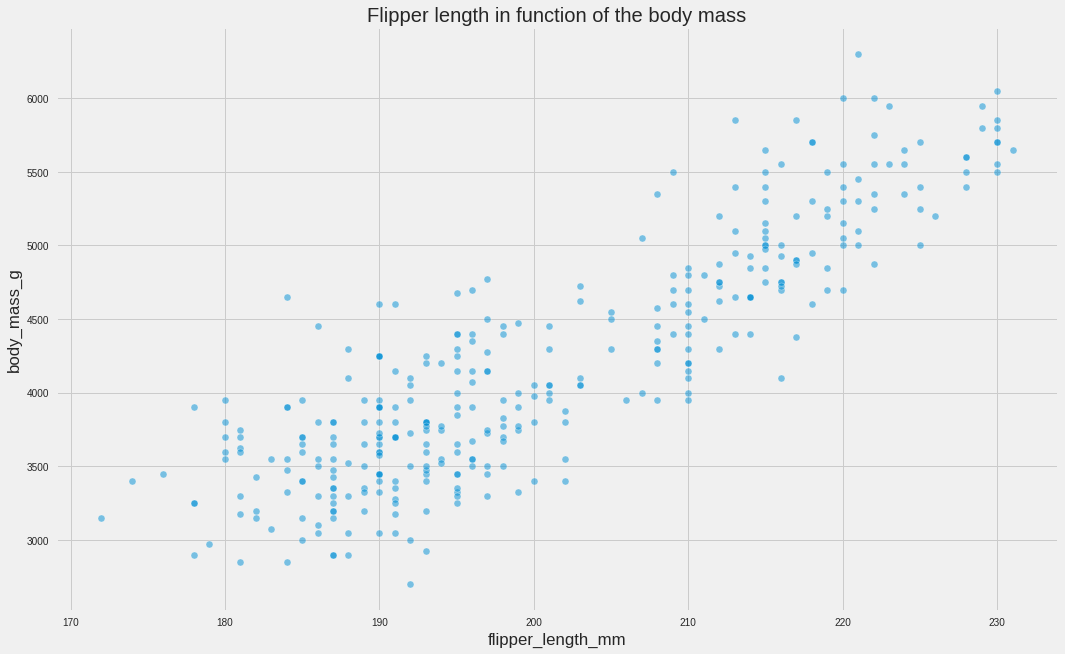

In [10]:
feature_name = "flipper_length_mm"
target_name = "body_mass_g"
data, target = df.drop(['species', 'body_mass_g'], axis=1), df.body_mass_g
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.scatterplot(data=df, x=feature_name,  y=target_name, alpha=0.5)
ax.set_title("Flipper length in function of the body mass")

In [13]:
df.body_mass_g.min(), df.body_mass_g.max()

(2700.0, 6300.0)

In [14]:
def f(flipper_length, a, b):
  return a * flipper_length + b

In [16]:
a = np.random.randint(low=0, high=100, size=1)
b = np.random.randint(low=-6000, high=6000, size=1)
flipper_length_range = np.linspace(data.min(), data.max(), num=500)

preds = f(flipper_length_range, a, b)